In [222]:
import os
import torch
import torch.nn as nn
from torch import optim
from torch.functional import F
from torch import Tensor
from scipy.stats import entropy as s_entropy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.chdir('C:/Users/amitx/Documents/Amit/Projects_Python/explainablity-transformer')

In [4]:
from transformers import BertForSequenceClassification
from nlp.BERT_explainability.modules.BERT.BertForSequenceClassification import BertForSequenceClassification
from nlp.BERT_explainability.modules.BERT.BertForSequenceClassification import BertForSequenceClassification as T_BertForSequenceClassification

In [309]:
def entropy(p_dist: Tensor) -> Tensor:
    # return sum([-p * torch.log2(p) if p > 0 else 0 for p in p_dist])
    return torch.sum(torch.nan_to_num_(-torch.log2(p_dist) * p_dist, nan=0.0))

In [5]:
model_name = 'textattack/bert-base-uncased-SST-2'

In [6]:
model_save_dir = 'nlp/notebook/classifier_hila.pt'

In [7]:
test_classifier = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to('cpu')
test_classifier.load_state_dict(torch.load(model_save_dir,map_location=torch.device('cpu')))

<All keys matched successfully>

In [8]:
temp_classifier = T_BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to('cpu')

In [9]:
temp_classifier.bert.embeddings.load_state_dict(test_classifier.bert.embeddings.state_dict())
temp_classifier.bert.encoder.layer.load_state_dict(test_classifier.bert.encoder.layer.state_dict())
temp_classifier.bert.pooler.load_state_dict(test_classifier.bert.pooler.state_dict())
temp_classifier.dropout.load_state_dict(test_classifier.dropout.state_dict())
temp_classifier.classifier.load_state_dict(test_classifier.classifier.state_dict())




<All keys matched successfully>

In [900]:


def l1_loss(p):
    return torch.mean(torch.abs(p))

def some_loss(x):
    return torch.sum(torch.abs(x))

In [896]:
loss_cret(x)

tensor(1., grad_fn=<SumBackward0>)

In [897]:
l1_loss(x)

tensor(0.0002, grad_fn=<MeanBackward0>)

In [898]:
some_loss(x)

tensor(0.0005, grad_fn=<SumBackward0>)

In [923]:
def entropy(p_dist: Tensor) -> Tensor:    
    return torch.sum(torch.nan_to_num_(-torch.log2(p_dist) * p_dist, nan=0.0))

def loss_entropy(temp):
    entropy_loss = entropy(F.softmax(temp, dim=-1))
    return entropy_loss

In [933]:
F.softmax( torch.ones(3),dim=-1)


tensor([0.3333, 0.3333, 0.3333])

In [986]:
print(x.detach().numpy())

[-3.18586116 -3.18586116 -3.18586116 -3.18586116 -3.18586116  6.18586167]


In [1036]:
x = torch.randint(2,(12,12,512),dtype=float)

In [1039]:
x=torch.ones(12,12,512)

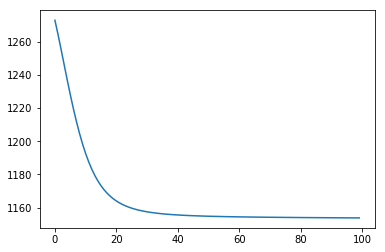

In [1047]:
x = torch.randint(2,(12,12,512),dtype=float)

x.requires_grad = True

optimizer = optim.Adam([x],lr = 1.0e-1)
lmbda = lambda epoch: epoch // 0.1

# print(x.detach().numpy())
# print(F.softmax(x,dim=-1).detach().numpy())

epoch_loss = []
for epoch in range(100):
    optimizer.zero_grad()
    output = loss_entropy(x)
    epoch_loss.append(output.item())
    output.backward()
    optimizer.step()
    
# print(x.detach().numpy())
# print(F.softmax(x,dim=-1).detach().numpy())
plt.plot(range(len(epoch_loss)),epoch_loss,label = f'{lr_a}')
plt.show()

In [1049]:
F.softmax(x,dim=-1).detach().numpy()

array([[[3.72962281e-03, 3.72962281e-03, 3.72962281e-03, ...,
         3.72962281e-03, 3.72962281e-03, 1.88970249e-06],
        [1.92439160e-06, 1.92439160e-06, 3.93505318e-03, ...,
         3.93505318e-03, 1.92439160e-06, 1.92439160e-06],
        [1.88727532e-06, 3.71576726e-03, 3.71576726e-03, ...,
         3.71576726e-03, 1.88727532e-06, 1.88727532e-06],
        ...,
        [1.96839839e-06, 4.21712528e-03, 4.21712528e-03, ...,
         4.21712528e-03, 4.21712528e-03, 1.96839839e-06],
        [4.09621883e-03, 4.09621883e-03, 1.95001640e-06, ...,
         4.09621883e-03, 1.95001640e-06, 1.95001640e-06],
        [3.90433065e-03, 3.90433065e-03, 3.90433065e-03, ...,
         1.91935315e-06, 3.90433065e-03, 3.90433065e-03]],

       [[3.93505318e-03, 1.92439160e-06, 3.93505318e-03, ...,
         1.92439160e-06, 1.92439160e-06, 1.92439160e-06],
        [3.81497671e-03, 3.81497671e-03, 3.81497671e-03, ...,
         1.90440529e-06, 3.81497671e-03, 1.90440529e-06],
        [1.91684449e-06, 

In [409]:
import pandas as pd

In [422]:
data = {'train':{'pos':800,
                 'neg':800,
                'total':1600},
        'val':{'pos':100,
                 'neg':100,
              'total':200},
        'test':{'pos':100,
                 'neg':100,
               'total':200}}

In [423]:
pd.DataFrame(data)

,train,val,test
pos,800,100,100
neg,800,100,100
total,1600,200,200


In [424]:
a = set([123,156,403,54])
b = set([143,123,7,214,23])

In [451]:
from transformers import BertTokenizer

In [453]:
tokenizer = BertTokenizer.from_pretrained('textattack/bert-base-uncased-SST-2')

['negR', '900']

In [598]:
# num_doc = 'negR_900'
num_doc = 'posR_900'
num_split = num_doc.split('_')
if (num_split[0]=='negR'):
    idx = int(num_split[1]) - 900
else:
    idx = int(num_split[1]) - 900 + 100
with open(f'datasets/movies/docs/{num_doc}.txt', 'r') as f:
    doc = f.read()

interned_documents = tokenizer.encode_plus(
                doc,
                add_special_tokens=True,
                max_length=512,
                return_token_type_ids=False,
                padding=False,
                return_attention_mask=True,
                return_tensors='pt',
                truncation=True,
            )

# df_a = pd.read_json('nlp/bert_models/movies/temp/06_27_2022__03_10_43/identifier_results_80.json',lines=True)
# df_b = pd.read_json('nlp/bert_models/movies/our/06_27_2022__03_10_43/identifier_results_80.json',lines=True)
df_a = pd.read_json('nlp/results/07_01_2022__00_49_33/temp_results/identifier_results_80.json',lines=True)
df_b = pd.read_json('nlp/results/07_01_2022__00_49_33/our_results/identifier_results_80.json',lines=True)

tokens_a = [df_a['rationales'].values[idx][0]['hard_rationale_predictions'][i]['start_token'] for i in range(80)]
tokens_b = [df_b['rationales'].values[idx][0]['hard_rationale_predictions'][i]['start_token'] for i in range(80)]

input_ids =interned_documents['input_ids']

arr_a = np.array (tokenizer.convert_ids_to_tokens(input_ids[0][1:]))[tokens_a]
arr_b = np.array (tokenizer.convert_ids_to_tokens(input_ids[0][1:]))[tokens_b]
merged  = np.array([arr_a,arr_b]).T
df_words = pd.DataFrame(merged,columns = ['model_a','model_b'])

In [599]:
only_a = list(set(df_words['model_a'].values) -set(df_words['model_b'].values))

In [600]:
only_b = list(set(df_words['model_b'].values) -set(df_words['model_a'].values))

In [601]:
df_diff = pd.DataFrame([only_a,only_b]).T

In [602]:
df_diff.columns= ['only_a','only_b']

In [603]:
df_diff

,only_a,only_b
0,int,##ably
1,even,great
2,makes,what
3,at,a
4,this,much
5,##cap,showing
6,played,detail
7,wreck,degree
8,t,by
9,start,with


In [574]:
df_words.head(50)

,model_a,model_b
0,of,shows
1,too,sea
2,for,up
3,the,##lo
4,spit,ship
5,characters,up
6,;,jewel
7,the,##y
8,snake,the
9,and,sl


In [575]:
df_words.iloc[50:].head(50)

,model_a,model_b
50,enhanced,a
51,##ot,o
52,inhibition,to
53,me,entirely
54,in,.
55,one,the
56,eyed,-
57,savage,-
58,hard,and
59,fa,##sea
